# Customer Segmentation Analysis

## Objectives

- **Segment customers based on purchasing behavior**: We will classify customers based on how they engage with the store, such as their recency, frequency, and monetary value of purchases.
- **Identify high-value customer groups**: These segments will help identify which customers are the most valuable, such as those who spend frequently and have high monetary value.
- **Develop targeted marketing strategies**: With customer segments defined, targeted campaigns or offers can be created for each group.

## Data Preprocessing

We begin by cleaning and preparing the data for the analysis. This includes handling missing values, transforming data types, and creating necessary features such as Recency, Frequency, and Monetary.

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load dataset
df = pd.read_csv('../data/cleaned_superstore.csv')

# Convert 'Order.Date' to datetime format
df['Order.Date'] = pd.to_datetime(df['Order.Date'])

## RFM (Recency, Frequency, Monetary) Analysis

RFM analysis helps us segment customers based on their purchasing behavior:

- **Recency (R)**: How recently a customer made a purchase.
- **Frequency (F)**: How often they make a purchase.
- **Monetary (M)**: How much money they spend.

We will calculate the Recency, Frequency, and Monetary metrics for each customer.


In [7]:
# Get Recency, Frequency, and Monetary (RFM) data for segmentation

# Calculate recency: days since last purchase
current_date = df['Order.Date'].max()
df['Recency'] = (current_date - df['Order.Date']).dt.days

# Calculate frequency: number of purchases per customer
customer_freq = df.groupby('Customer.ID')['Order.ID'].count().reset_index()
customer_freq.rename(columns={'Order.ID': 'Frequency'}, inplace=True)

# Calculate monetary: total sales per customer
customer_monetary = df.groupby('Customer.ID')['Sales'].sum().reset_index()
customer_monetary.rename(columns={'Sales': 'Monetary'}, inplace=True)

# Merge recency, frequency, and monetary data
rfm_df = pd.merge(customer_freq, customer_monetary, on='Customer.ID', how='left')
rfm_df = pd.merge(rfm_df, df[['Customer.ID', 'Recency']].drop_duplicates(), on='Customer.ID', how='left')

## Normalize RFM Data
To ensure that all metrics are on the same scale, we will normalize the values of **Recency**, **Frequency**, and **Monetary**.

In [8]:
# Normalizing RFM data
rfm_df['Recency'] = rfm_df['Recency'] / rfm_df['Recency'].max()
rfm_df['Frequency'] = rfm_df['Frequency'] / rfm_df['Frequency'].max()
rfm_df['Monetary'] = rfm_df['Monetary'] / rfm_df['Monetary'].max()

## Clustering Customers

We will now apply clustering algorithms like K-Means to group customers into segments based on their RFM scores. K-Means is an unsupervised machine learning technique that assigns customers to different clusters based on similarity.

We will visualize the results to understand the different customer segments.

In [9]:
# K-means clustering for segmentation (3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_df[['Recency', 'Frequency', 'Monetary']])

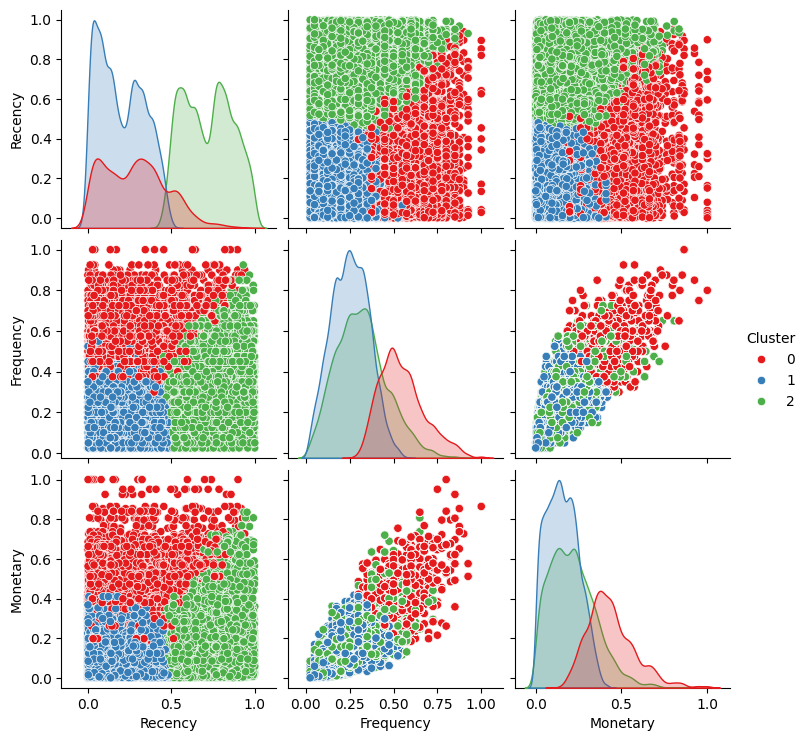

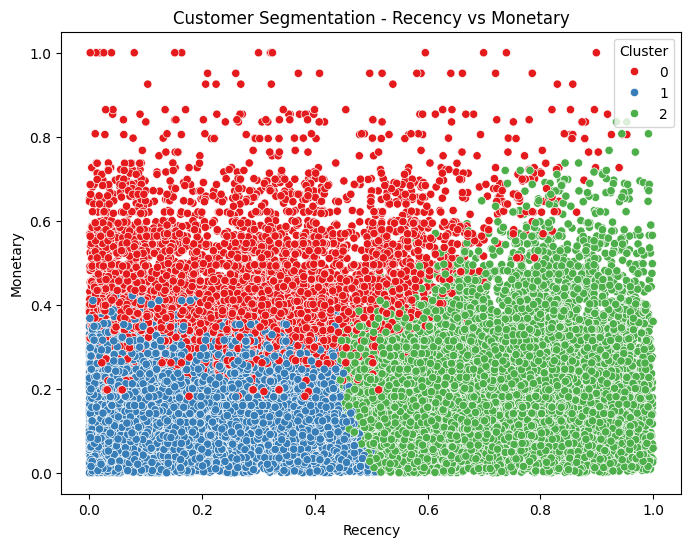

In [10]:
# Visualizing the clusters
sns.pairplot(rfm_df[['Recency', 'Frequency', 'Monetary', 'Cluster']], hue='Cluster', palette='Set1')
plt.show()

# Visualize the customer segments using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Recency', y='Monetary', hue='Cluster', data=rfm_df, palette='Set1')
plt.title("Customer Segmentation - Recency vs Monetary")
plt.xlabel("Recency")
plt.ylabel("Monetary")
plt.show()

## Cluster Summary

We summarize the key characteristics of each customer segment based on their Recency, Frequency, and Monetary values.

In [11]:
# Summary of the clusters
cluster_summary = rfm_df.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()

print(cluster_summary)

   Cluster   Recency  Frequency  Monetary
0        0  0.284804   0.547099  0.436423
1        1  0.197541   0.251651  0.154930
2        2  0.717557   0.315684  0.214488


## Interpretation of Results

Here’s a summary of the customer segments based on the RFM analysis:

| Cluster | Recency (Mean) | Frequency (Mean) | Monetary (Mean) |
|---------|----------------|------------------|-----------------|
| 0       | 0.284804       | 0.547099         | 0.436423        |
| 1       | 0.197541       | 0.251651         | 0.154930        |
| 2       | 0.717557       | 0.315684         | 0.214488        |

### Cluster Interpretation

- **Cluster 0: Champions**: Customers with recent, frequent, and high-value purchases.
- **Cluster 1: At-Risk Customers**: Customers who have not purchased recently, with low frequency and low spending.
- **Cluster 2: Potential Loyalists**: Customers with high recency but low frequency and monetary value.

These clusters help us identify customer behavior patterns and create targeted marketing strategies.


## Next Steps / Marketing Strategies

We can use the clusters to target different customer groups with specific strategies:

- **Champions**: Offer exclusive rewards, loyalty programs, and personalized experiences.
- **At-Risk Customers**: Re-engage them with discounts, reminders, and special offers.
- **Potential Loyalists**: Use personalized campaigns and time-limited discounts to increase their engagement.

By targeting each customer segment with the appropriate strategies, we can improve customer retention and increase sales.


## Conclusion

This customer segmentation analysis allows us to understand customer behaviors and segment them effectively for targeted marketing. The results from the clustering can help businesses tailor strategies to increase customer retention and drive sales growth.
